In [37]:
import pandas as pd
import seaborn as sns
import matplotlib as mtl
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [38]:
pwd = os.getcwd()
path = os.path.join(pwd, 'heart.csv')
df = pd.read_csv(path)

In [39]:
df_num = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

In [40]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

In [42]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [43]:
pca_variance = pca.explained_variance_ratio_
pca_variance

array([0.23581966, 0.11229748, 0.08800207, 0.08618849, 0.07300207,
       0.06929774, 0.06165962, 0.05543521, 0.05208534, 0.04448005,
       0.03817159, 0.03071669, 0.02656258, 0.02628139])

In [44]:
pca_variance_df = pd.DataFrame({'|Variance %': pca_variance*100})
pca_variance_df

,|Variance %
0,23.581966
1,11.229748
2,8.800207
3,8.618849
4,7.300207
5,6.929774
6,6.165962
7,5.543521
8,5.208534
9,4.448005


Text(0, 0.5, 'Cumulative Explained Variance')

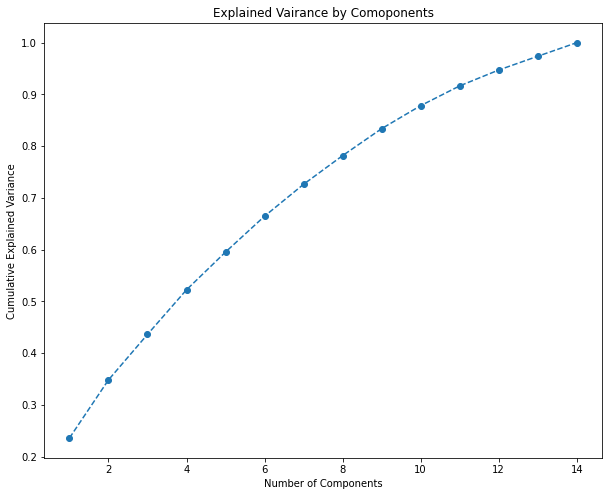

In [45]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Vairance by Comoponents')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [46]:
pca = PCA(n_components=3)

In [47]:
pca.fit(segmentation_std)

PCA(n_components=3)

In [48]:
scores_pca = pca.transform(segmentation_std)

In [49]:
SSE = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    SSE.append(kmeans_pca.inertia_)

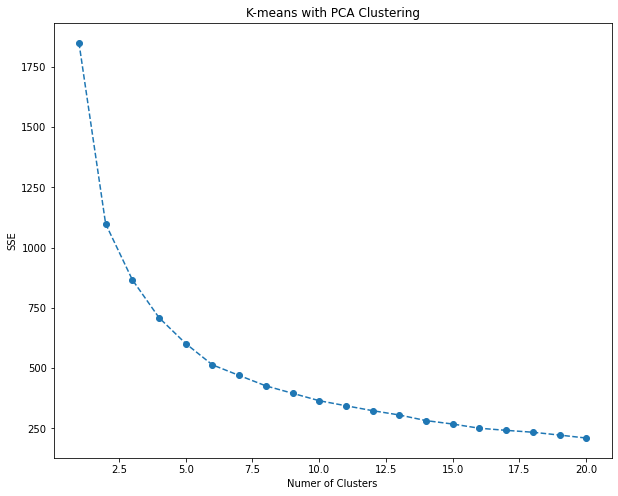

In [50]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), SSE, marker = 'o', linestyle = '--')
plt.xlabel('Numer of Clusters')
plt.ylabel('SSE')
plt.title('K-means with PCA Clustering')
plt.show()

In [51]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state=42)

In [52]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [53]:
x = pd.DataFrame(scores_pca)
x

,0,1,2
0,-0.051739,2.624022,0.990054
1,-0.817441,-0.730375,-0.235928
2,-2.057599,-0.039098,-0.519839
3,-1.903043,-0.596701,0.076204
4,-0.768371,0.412545,-2.187455
...,...,...,...
298,1.485287,-0.423483,-1.683247
299,-0.140325,-1.215922,0.138325
300,2.681772,0.593019,1.791015
301,2.170858,-2.166992,-0.081516


In [54]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['PC1', 'PC2', 'PC3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [55]:
df_segm_pca_kmeans.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,PC1,PC2,PC3,Segment K-means PCA
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,-0.051739,2.624022,0.990054,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,-0.817441,-0.730375,-0.235928,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,-2.057599,-0.039098,-0.519839,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,-1.903043,-0.596701,0.076204,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,-0.768371,0.412545,-2.187455,2


In [56]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth'})

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clusters by PCA components')

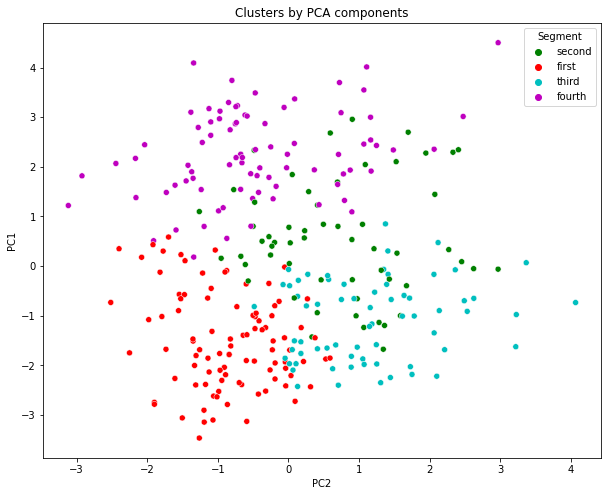

In [57]:
x_axis = df_segm_pca_kmeans['PC2']
y_axis = df_segm_pca_kmeans['PC1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette= ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA components')